# 1 Normalisation et Standardisation

En machine learning, il est souvent nécessaire de normaliser ou de standardiser les données pour améliorer les performances des modèles. Ces deux 
techniques permettent de mettre les données à une échelle commune et de faciliter l'apprentissage des algorithmes.

## Normalisation

### MinMax scaler

La normalisation min max consiste à mettre les données à l'échelle entre 0 et 1. Cela se fait en soustrayant la valeur minimale de chaque point de 
données et en divisant par la différence entre la valeur maximale et la valeur minimale. La formule mathématique de la normalisation est la suivante :

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

La normalisation est particulièrement utile lorsque les données ont des écarts importants entre les valeurs, par exemple dans les images ou les sons.

###  MaxAbsScaler
Le MaxAbsScaler est une technique de mise à l'échelle qui divise chaque valeur par la valeur absolue maximale de la colonne. La formule mathématique 
pour le MaxAbsScaler est la suivante :

$$x_{scaled} = \frac{x}{|x_{max}|}$$

Le MaxAbsScaler est utile lorsque vous voulez mettre à l'échelle les données sans déformer la distribution des données, en particulier lorsque les 
valeurs sont centrées autour de zéro. Par exemple, si vous avez des données qui ont une moyenne de zéro et une plage de valeurs qui va de -100 à 100, 
le MaxAbsScaler peut être une bonne option.


## Standardisation

### Standard Scaler

La standardisation consiste à mettre les données à l'échelle de telle sorte que la moyenne soit égale à zéro et l'écart type égal à 1. Cela se fait 
en soustrayant la moyenne de chaque point de données et en divisant par l'écart type. La formule mathématique de la standardisation est la suivante :

$$x_{std} = \frac{x - \mu}{\sigma}$$

La standardisation est particulièrement utile lorsque les données sont normalement distribuées.

### Robust Scaler

Le RobustScaler est un outil de standardisation qui permet de centrer les données autour de la médiane et de réduire l'effet des valeurs aberrantes 
en les ramenant à un certain point. Cela se fait en soustrayant la médiane de chaque point de données et en divisant par l'écart interquartile (IQR). 
La formule mathématique de la normalisation est la suivante :

$$x_{robust} = \frac{x - \text{médiane}(x)}{\text{IQR}(x)}$$

Le RobustScaler est particulièrement utile lorsque les données contiennent des valeurs aberrantes qui pourraient influencer la moyenne et l'écart-type 
dans le cas d'une StandardScaler classique. Il est également résistant aux valeurs aberrantes et peut être utilisé dans les données qui ne suivent pas 
une distribution normale.


## Comment choisir entre la normalisation et la standardisation

Le choix entre la normalisation et la standardisation dépend des données et du modèle utilisé. En général, la normalisation est utilisée pour les données qui ont des écarts importants entre les valeurs, tandis que la standardisation est utilisée pour les données qui sont normalement distribuées.

Il est recommandé de tester les deux méthodes pour voir laquelle fonctionne le mieux pour un modèle donné.


| Critère | Normalisation | Standardisation |
| --- | --- | --- |
| Objectif | Mettre les valeurs dans un intervalle borné | Centrer les valeurs autour de 0 et réduire l'échelle |
| Formule | (x - min) / (max - min) | (x - moyenne) / écart-type |
| Plage de sortie | [0, 1] | Potentiellement sans bornes |
| Sensibilité aux valeurs aberrantes | Sensible : les valeurs extrêmes ont un impact sur la plage de sortie | Moins sensible : les valeurs extrêmes sont réduites à un certain point |
| Interprétation | Les valeurs normalisées sont plus facilement interprétables, car elles sont mises à l'échelle d'une plage spécifique | Les valeurs standardisées sont centrées autour de 0 et leur échelle est déterminée par l'écart-type, ce qui les rend moins interprétables |
| Utilisation | Pour les algorithmes qui requièrent des données sur une plage bornée, tels que les réseaux de neurones et les algorithmes de clustering basés sur la distance | Pour les algorithmes qui requièrent des données centrées autour de 0 et avec une échelle comparable, tels que la régression linéaire et les SVM |
| Exemples d'algorithmes | MinMaxScaler, MaxAbsScaler | StandardScaler, RobustScaler |






In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [10]:
# Charger les données Iris
iris = load_iris()
x = iris.data
y = iris.target

<function matplotlib.pyplot.show(close=None, block=None)>

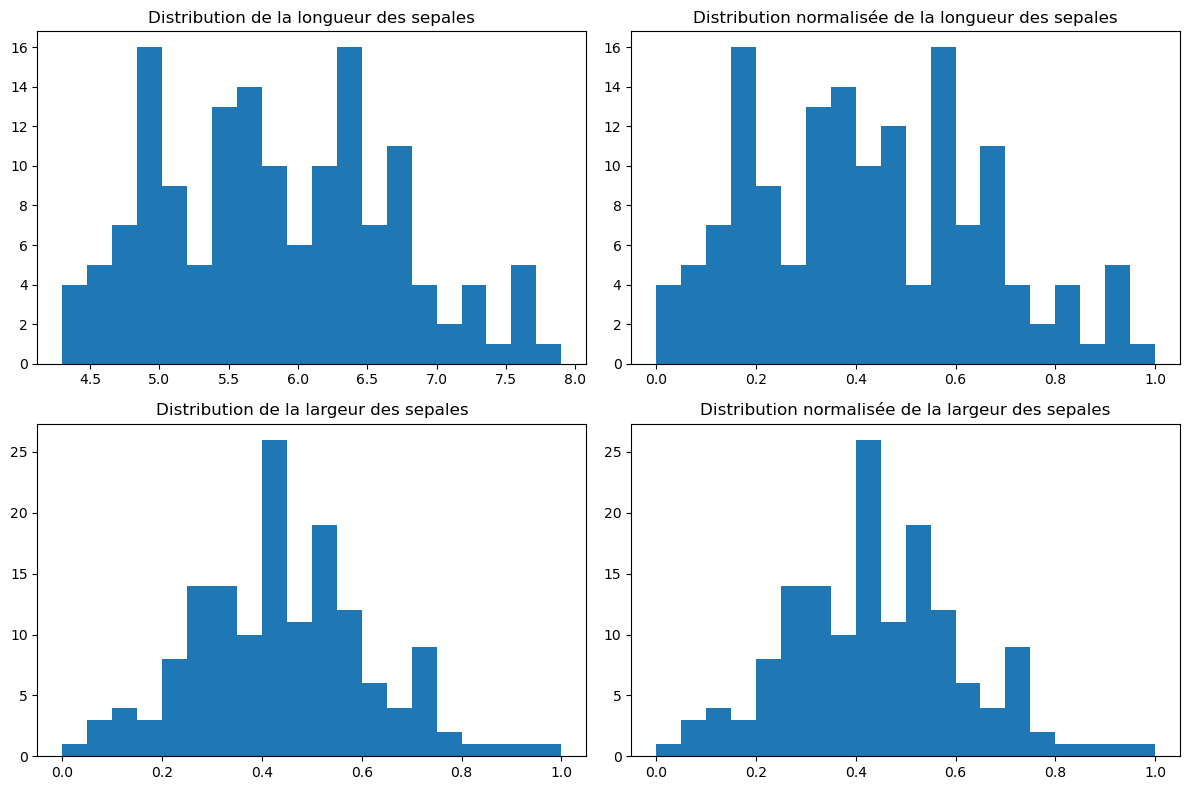

In [16]:
# Normalisation
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# Comparer les distributions avant et apres la normalisation et la standardisation
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].hist(x[:, 0], bins=20)
axs[0, 0].set_title('Distribution de la longueur des sepales')
axs[0, 1].hist(x_norm[:, 0], bins=20)
axs[0, 1].set_title('Distribution normalisée de la longueur des sepales')
axs[1, 0].hist(x_norm[:, 1], bins=20)
axs[1, 0].set_title('Distribution de la largeur des sepales')
axs[1, 1].hist(x_norm[:, 1], bins=20)
axs[1, 1].set_title('Distribution normalisée de la largeur des sepales')
fig.tight_layout()
plt.show

#### MinMaxScaler finit avec une distribution entre 0 et 1

In [23]:
# Standardisation ( qui va consister à avoir une variable centrée réduite, ce sera a peu pres comme une loi normale, mais ce ne sera pas 
## forcement une loi normale
scaler= StandardScaler()
x_std = scaler.fit_transform(x)

<function matplotlib.pyplot.show(close=None, block=None)>

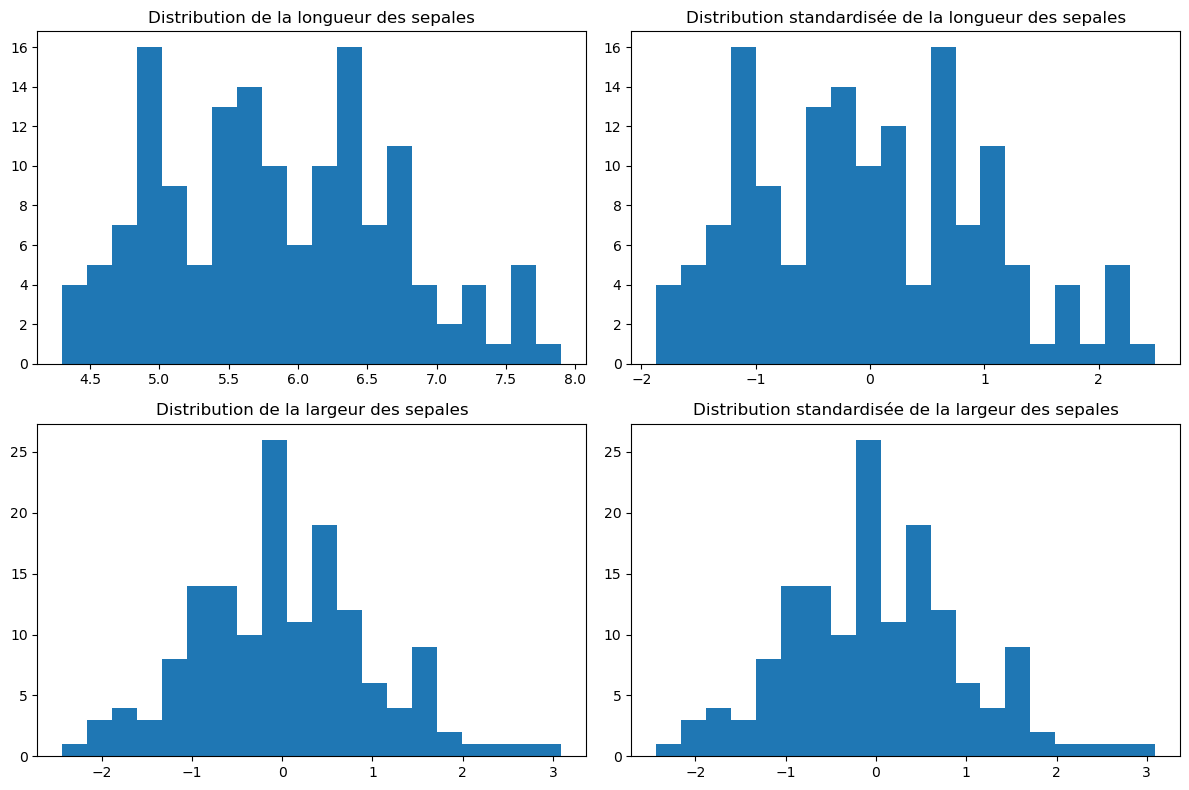

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2,  figsize=(12, 8))
axs[0, 0].hist(x[:, 0], bins=20)
axs[0, 0].set_title('Distribution de la longueur des sepales')
axs[0, 1].hist(x_std[:, 0], bins=20)
axs[0, 1].set_title('Distribution standardisée de la longueur des sepales')
axs[1, 0].hist(x_std[:, 1], bins=20)
axs[1, 0].set_title('Distribution de la largeur des sepales')
axs[1, 1].hist(x_std[:, 1], bins=20)
axs[1, 1].set_title('Distribution standardisée de la largeur des sepales')
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

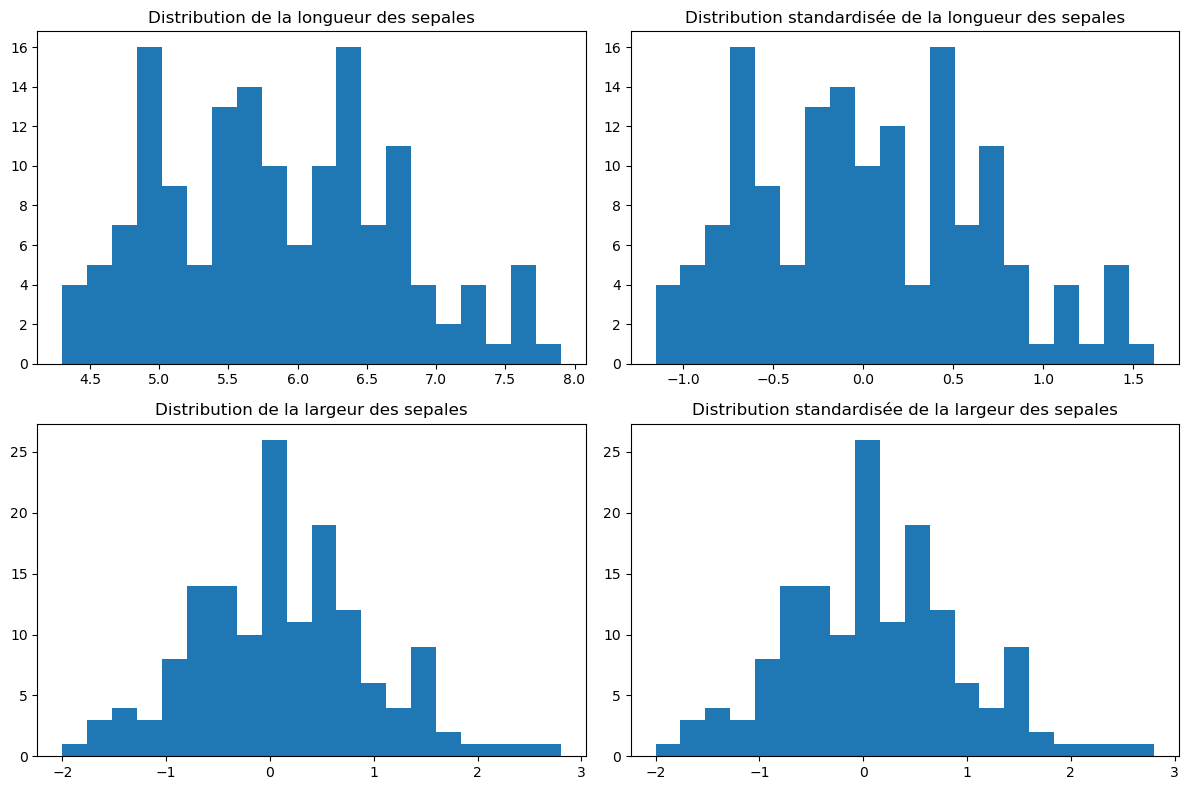

In [27]:
# RobustScaler

scaler = RobustScaler()
x_robust = scaler.fit_transform(x)

fig, axs = plt.subplots(nrows=2, ncols=2,  figsize=(12, 8))
axs[0, 0].hist(x[:, 0], bins=20)
axs[0, 0].set_title('Distribution de la longueur des sepales')
axs[0, 1].hist(x_robust[:, 0], bins=20)
axs[0, 1].set_title('Distribution standardisée de la longueur des sepales')
axs[1, 0].hist(x_robust[:, 1], bins=20)
axs[1, 0].set_title('Distribution de la largeur des sepales')
axs[1, 1].hist(x_robust[:, 1], bins=20)
axs[1, 1].set_title('Distribution standardisée de la largeur des sepales')
fig.tight_layout()
plt.show


In [ ]:
# MaxAbsScaler
scaler = MaxAbsScaler()
x_maxabs =  scaler.fit_transform(